In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import html5lib
import requests
import json

In [3]:
demo = "YOUR API KEY"

tickers = ['SPY','DAL','TM','BAC','MTB','BK','BMY',
           'GLD','KO','GL','PG','KR','WMT',
           'ERIC','MDT','JNJ','AAPL']


data={}
data_stat_daily_ret = {}
data_stat_adjClose_daily_ret = {}

data_stat_daily_ret_log = {}
data_stat_adjClose_daily_ret_log = {}

aggregate_stocks_daily_ret = {}
aggregate_stocks_daily_close = {}
aggregate_stocks_daily_log_ret = {}

In [4]:
def get_data (ticker):
    
    global data
    
    try: 
        # Transform the Json String to Pandas DataFrame
        
        stocks = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?apikey={demo}').json()
        stocks = stocks['historical']
        stock_prices_data = pd.DataFrame.from_dict(stocks)
        data[ticker] = stock_prices_data
        data[ticker]['ticker']=ticker
        
        # Sort Values by Date
        data[ticker] = data[ticker].sort_values(by="date")
        
        # Set Date as Index 
        data[ticker] = data[ticker].set_index('date')
        
        print('get_data_function_completed for: ' + ticker)
        print(ticker + ": Data Added Succesfully")

    except:
        
        print('ERROR_get_data_function_NOT_completed for: ' + ticker)
        print('ERROR something wen wrong with Data : ' + ticker)

In [5]:
def stocks_daily_ret (ticker):
    
    # Daily Returns 
    try:
        
        #  Daily Returns with Close Prices 
        
        data[ticker]['dailyReturns'] =  data[ticker]['close'].pct_change(1)
        
        # Daily Returns with Adj. Close Prices 
        
        data[ticker]['adjCloseDailyReturns'] =  data[ticker]['adjClose'].pct_change(1)
        
        print('stocks_daily_ret_function_completed for: ' + ticker)
        
    except:
        
        print('ERROR_stocks_daily_ret_function_NOT_completed for: ' + ticker)
        

In [6]:
def stocks_daily_log_ret (ticker):
    
    # Daily log Returns 
    
    try:
        
        #  Daily log Returns with Close Prices 
        
        data[ticker]['dailyLogReturns'] =  np.log(data[ticker]['close']/data[ticker]['close'].shift(1))
        
        # Daily log Returns with Adj. Close Prices 
        
        data[ticker]['adjCloseDailyLogReturns'] =  np.log(data[ticker]['adjClose']/data[ticker]['adjClose'].shift(1))
        
        print('stocks_daily_log_ret_function_completed for: ' + ticker)
        
    except:
        
        print('ERROR_stocks_daily_log_ret_function_NOT_completed for: ' + ticker)

In [7]:
def stocks_cum_ret (ticker):
    
    try:
        
        # Cumulative Returns
    
        data[ticker]['cumulativeReturn'] = data[ticker]['adjClose']/data[ticker].iloc[0]['adjClose']
        
        print('stocks_cum_ret_function_completed for: ' + ticker)
        
    except:
        
        print('ERROR_stocks_cum_ret_function_NOT_completed for: ' + ticker)

In [8]:
 def descr_stat (ticker):
    
    # Descriptive Statistics
    
    global data_stat_daily_ret
    global data_stat_adjClose
    global join_data_stat_close_log
    global data_stat_adjClose_log
    
    try:
        
        # Daily Returns Stats
        data_stat_daily_ret[ticker] = data[ticker]['dailyReturns'].describe()
        data_stat_adjClose_daily_ret[ticker] = data[ticker]['adjCloseDailyReturns'].describe()
        
        # Daily Logarithmic Returns Stats
        data_stat_daily_ret_log[ticker] = data[ticker]['dailyLogReturns'].describe()
        data_stat_adjClose_daily_ret_log[ticker] = data[ticker]['adjCloseDailyLogReturns'].describe()
        
        print('descr_stat_function_completed for: ' + ticker)  
    except:
        print('ERROR_descr_stat_function_NOT_completed for: ' + ticker) 

In [9]:
def aggregate_daily_returns (ticker):
    
    global aggregate_stocks_daily_ret
    
    try:  
        aggregate_stocks_daily_ret[ticker] = data[ticker]['dailyReturns']  
        print('aggregate_daily_returns_completed for: ' + ticker)   
    except:  
        print('ERROR_aggregate_daily_returns_NOT_completed for: ' + ticker)

In [10]:
def aggregate_close_price (ticker):
    
    global aggregate_stocks_daily_close
    
    try:
        aggregate_stocks_daily_close[ticker] = data[ticker]['close']
        print('aggregate_close_completed for: ' + ticker)        
    except:  
        print('ERROR_aggregate_close_NOT_completed for: ' + ticker)

In [11]:
def aggregate_daily_log_returns (ticker):
    
    global aggregate_stocks_daily_log_ret
    
    try:  
        aggregate_stocks_daily_log_ret[ticker] = data[ticker]['dailyLogReturns']  
        print('aggregate_daily_log_returns_completed for: ' + ticker)   
    except:  
        print('ERROR_aggregate_log_daily_returns_NOT_completed for: ' + ticker)

In [12]:
for ticker in tickers:
    
    try: 
        get_data (ticker)
        stocks_daily_ret (ticker)
        stocks_daily_log_ret (ticker)
        stocks_cum_ret (ticker)
        aggregate_daily_returns (ticker)
        aggregate_close_price (ticker)
        aggregate_daily_log_returns (ticker)
        descr_stat (ticker)
        
        print(ticker + ": Added Succesfully")
    except:
        print('ERROR something went wrong with : ' + ticker)

# Merge stock Data 

join_stock_data = pd.concat(data)
        
# Combined DF Of Close Prices
aggregate_stocks_daily_close = pd.DataFrame(aggregate_stocks_daily_close)

# Combined DF of Stocks Daily Returns 
aggregate_stocks_daily_ret = pd.DataFrame(aggregate_stocks_daily_ret)

# Descriptive Stats for Daily Returns of Close Price
aggregate_data_stat_daily_ret = pd.concat(data_stat_daily_ret,axis=1)
aggregate_data_stat_daily_ret = aggregate_data_stat_daily_ret.T

# Combined DF of Stocks Logarithmic Daily Returns
aggregate_stocks_daily_log_ret = pd.DataFrame(aggregate_stocks_daily_log_ret)

# Descriptive Stats for Daily Log Returns of Close Price
aggregate_data_stat_daily_ret_log = pd.concat(data_stat_daily_ret_log,axis=1)
aggregate_data_stat_daily_ret_log = aggregate_data_stat_daily_ret_log.T

get_data_function_completed for: SPY
SPY: Data Added Succesfully
stocks_daily_ret_function_completed for: SPY
stocks_daily_log_ret_function_completed for: SPY
stocks_cum_ret_function_completed for: SPY
aggregate_daily_returns_completed for: SPY
aggregate_close_completed for: SPY
aggregate_daily_log_returns_completed for: SPY
descr_stat_function_completed for: SPY
SPY: Added Succesfully
get_data_function_completed for: DAL
DAL: Data Added Succesfully
stocks_daily_ret_function_completed for: DAL
stocks_daily_log_ret_function_completed for: DAL
stocks_cum_ret_function_completed for: DAL
aggregate_daily_returns_completed for: DAL
aggregate_close_completed for: DAL
aggregate_daily_log_returns_completed for: DAL
descr_stat_function_completed for: DAL
DAL: Added Succesfully
get_data_function_completed for: TM
TM: Data Added Succesfully
stocks_daily_ret_function_completed for: TM
stocks_daily_log_ret_function_completed for: TM
stocks_cum_ret_function_completed for: TM
aggregate_daily_returns_c

In [13]:
from scipy.optimize import minimize

In [14]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(aggregate_stocks_daily_log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(aggregate_stocks_daily_log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

# multiply by 252 of the year bussines days
# daily_log_ret.mean()*252
# daily_log_ret.std()*252

In [15]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [16]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [43]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

# Initial Guess (equal distribution)

init_guess = []
boundsList = []
bounds = ()

for i in range(0,len(tickers)):
   
   init_guess.append(1/len(tickers))
    
   # 0-1 bounds for each weight
   boundsList.append((0, 1))
bounds = tuple(boundsList)

# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

# Optimization Results for Ret Vol Sharp Ratio 
optimization_results = get_ret_vol_sr(opt_results.x)

# Allocation of stock Weights
allocation = pd.DataFrame(columns=['Tickers','Weights'], dtype=object)
for ticker,results in zip(tickers,opt_results.x):
    new_row = {'Tickers':ticker,
               'Weights': results}
    allocation = allocation.append(new_row, ignore_index=True)

# Transform Allocation Weights into % format 
    #allocation['Weights'] = pd.Series(["{0:.2f}%".format(val * 100) for val in allocation['Weights']], index = allocation.index)

# Sequential Least SQuares Programming (SLSQP) Results. 
opt_results

     fun: -1.0128254983515128
     jac: array([ 3.78249943e-01,  1.60896580e+00,  1.40089914e-01,  4.66452003e-01,
        6.91794544e-01,  9.55825135e-01,  1.52135998e-01, -1.93983316e-04,
        1.38065353e-01,  5.20859942e-01, -2.90513039e-04, -1.70975924e-04,
        9.54164565e-03,  9.91138145e-01,  5.83096713e-01,  1.85763299e-01,
        3.16202641e-04])
 message: 'Optimization terminated successfully'
    nfev: 166
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.00000000e+00, 2.84194381e-15, 0.00000000e+00, 0.00000000e+00,
       6.17389032e-17, 2.00697387e-16, 0.00000000e+00, 4.43855673e-01,
       0.00000000e+00, 0.00000000e+00, 1.93759476e-02, 1.60097576e-01,
       0.00000000e+00, 1.54315398e-16, 3.75073560e-16, 0.00000000e+00,
       3.76670803e-01])

In [44]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [45]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [46]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

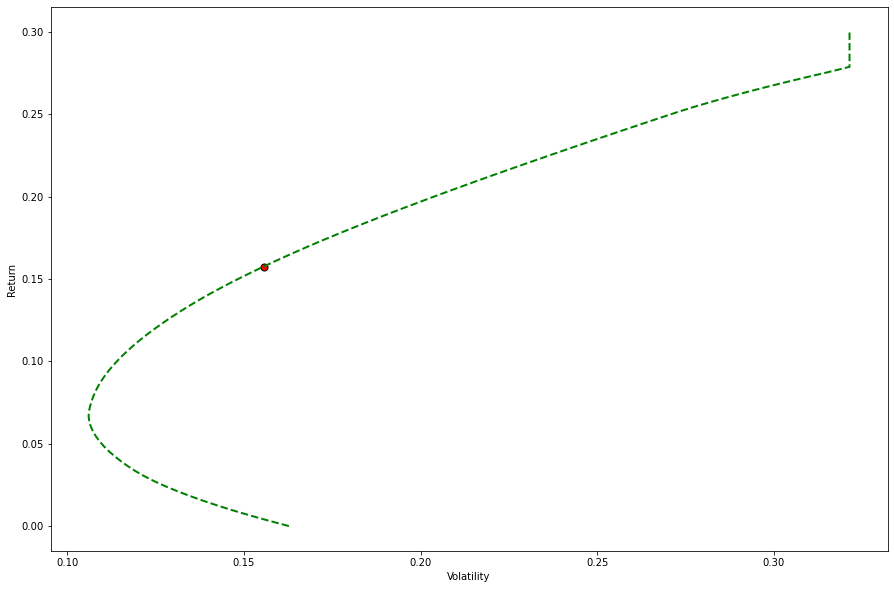

In [47]:
plt.figure(figsize=(15,10))
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=2)
plt.scatter(optimization_results[1],optimization_results[0],c='red',s=50,edgecolors='black')

In [48]:
optimization_results

array([0.15753489, 0.15554001, 1.0128255 ])

In [49]:
allocation['Weights'] = round(allocation['Weights']*100,4)

In [50]:
allocation

,Tickers,Weights
0,SPY,0.0000
1,DAL,0.0000
2,TM,0.0000
3,BAC,0.0000
4,MTB,0.0000
5,BK,0.0000
6,BMY,0.0000
7,GLD,44.3856
8,KO,0.0000
9,GL,0.0000


In [24]:
# Covvariance of Daily Returns
cov_daily_ret = aggregate_stocks_daily_ret.cov()

In [25]:
# Correlation of Daily Returns
corr_daily_ret = aggregate_stocks_daily_ret.corr()

In [26]:
# Combined Descriptive Stats for Daily Returns based on Close Price
aggregate_data_stat_daily_ret

,count,mean,std,min,25%,50%,75%,max
SPY,1259.0,0.000597,0.011981,-0.109424,-0.003080,0.000787,0.005838,0.090603
DAL,1259.0,0.000190,0.027829,-0.259924,-0.010815,-0.000175,0.010120,0.210171
TM,1259.0,0.000499,0.012912,-0.086245,-0.005803,0.000601,0.007121,0.095760
BAC,1259.0,0.000774,0.021315,-0.153973,-0.008074,0.000666,0.010756,0.177962
MTB,1259.0,0.000277,0.022786,-0.132103,-0.009099,0.000431,0.009876,0.250959
BK,1259.0,0.000384,0.018587,-0.145034,-0.006921,0.000794,0.009060,0.156165
BMY,1259.0,0.000309,0.015300,-0.139424,-0.007124,0.000791,0.007974,0.068419
GLD,1259.0,0.000346,0.008441,-0.053694,-0.003961,0.000576,0.004750,0.048530
KO,1259.0,0.000382,0.012738,-0.096725,-0.004565,0.000696,0.005987,0.064796
GL,1259.0,0.000420,0.018303,-0.134535,-0.006095,0.000995,0.007929,0.124334


In [27]:
# Correlation of Daily Log Returns 
corr_daily_log_ret= aggregate_stocks_daily_log_ret.corr()

In [28]:
# Covariance of Daily Log Returns
cov_daily_log_ret = aggregate_stocks_daily_log_ret.cov()

In [29]:
# Combined Descriptive Stats for Daily Log Returns based on Close Price
aggregate_data_stat_daily_ret_log

,count,mean,std,min,25%,50%,75%,max
SPY,1259.0,0.000525,0.012046,-0.115887,-0.003085,0.000787,0.005821,0.086731
DAL,1259.0,-0.000201,0.028084,-0.301003,-0.010874,-0.000175,0.010069,0.190762
TM,1259.0,0.000416,0.012897,-0.090193,-0.005820,0.000600,0.007096,0.091449
BAC,1259.0,0.000547,0.021286,-0.167205,-0.008107,0.000666,0.010699,0.163786
MTB,1259.0,0.000021,0.022594,-0.141682,-0.009140,0.000431,0.009827,0.223910
BK,1259.0,0.000210,0.018652,-0.156693,-0.006945,0.000794,0.009019,0.145109
BMY,1259.0,0.000190,0.015424,-0.150153,-0.007149,0.000791,0.007942,0.066180
GLD,1259.0,0.000310,0.008454,-0.055190,-0.003969,0.000576,0.004738,0.047390
KO,1259.0,0.000300,0.012809,-0.101728,-0.004576,0.000696,0.005969,0.062783
GL,1259.0,0.000251,0.018394,-0.144488,-0.006114,0.000995,0.007898,0.117190


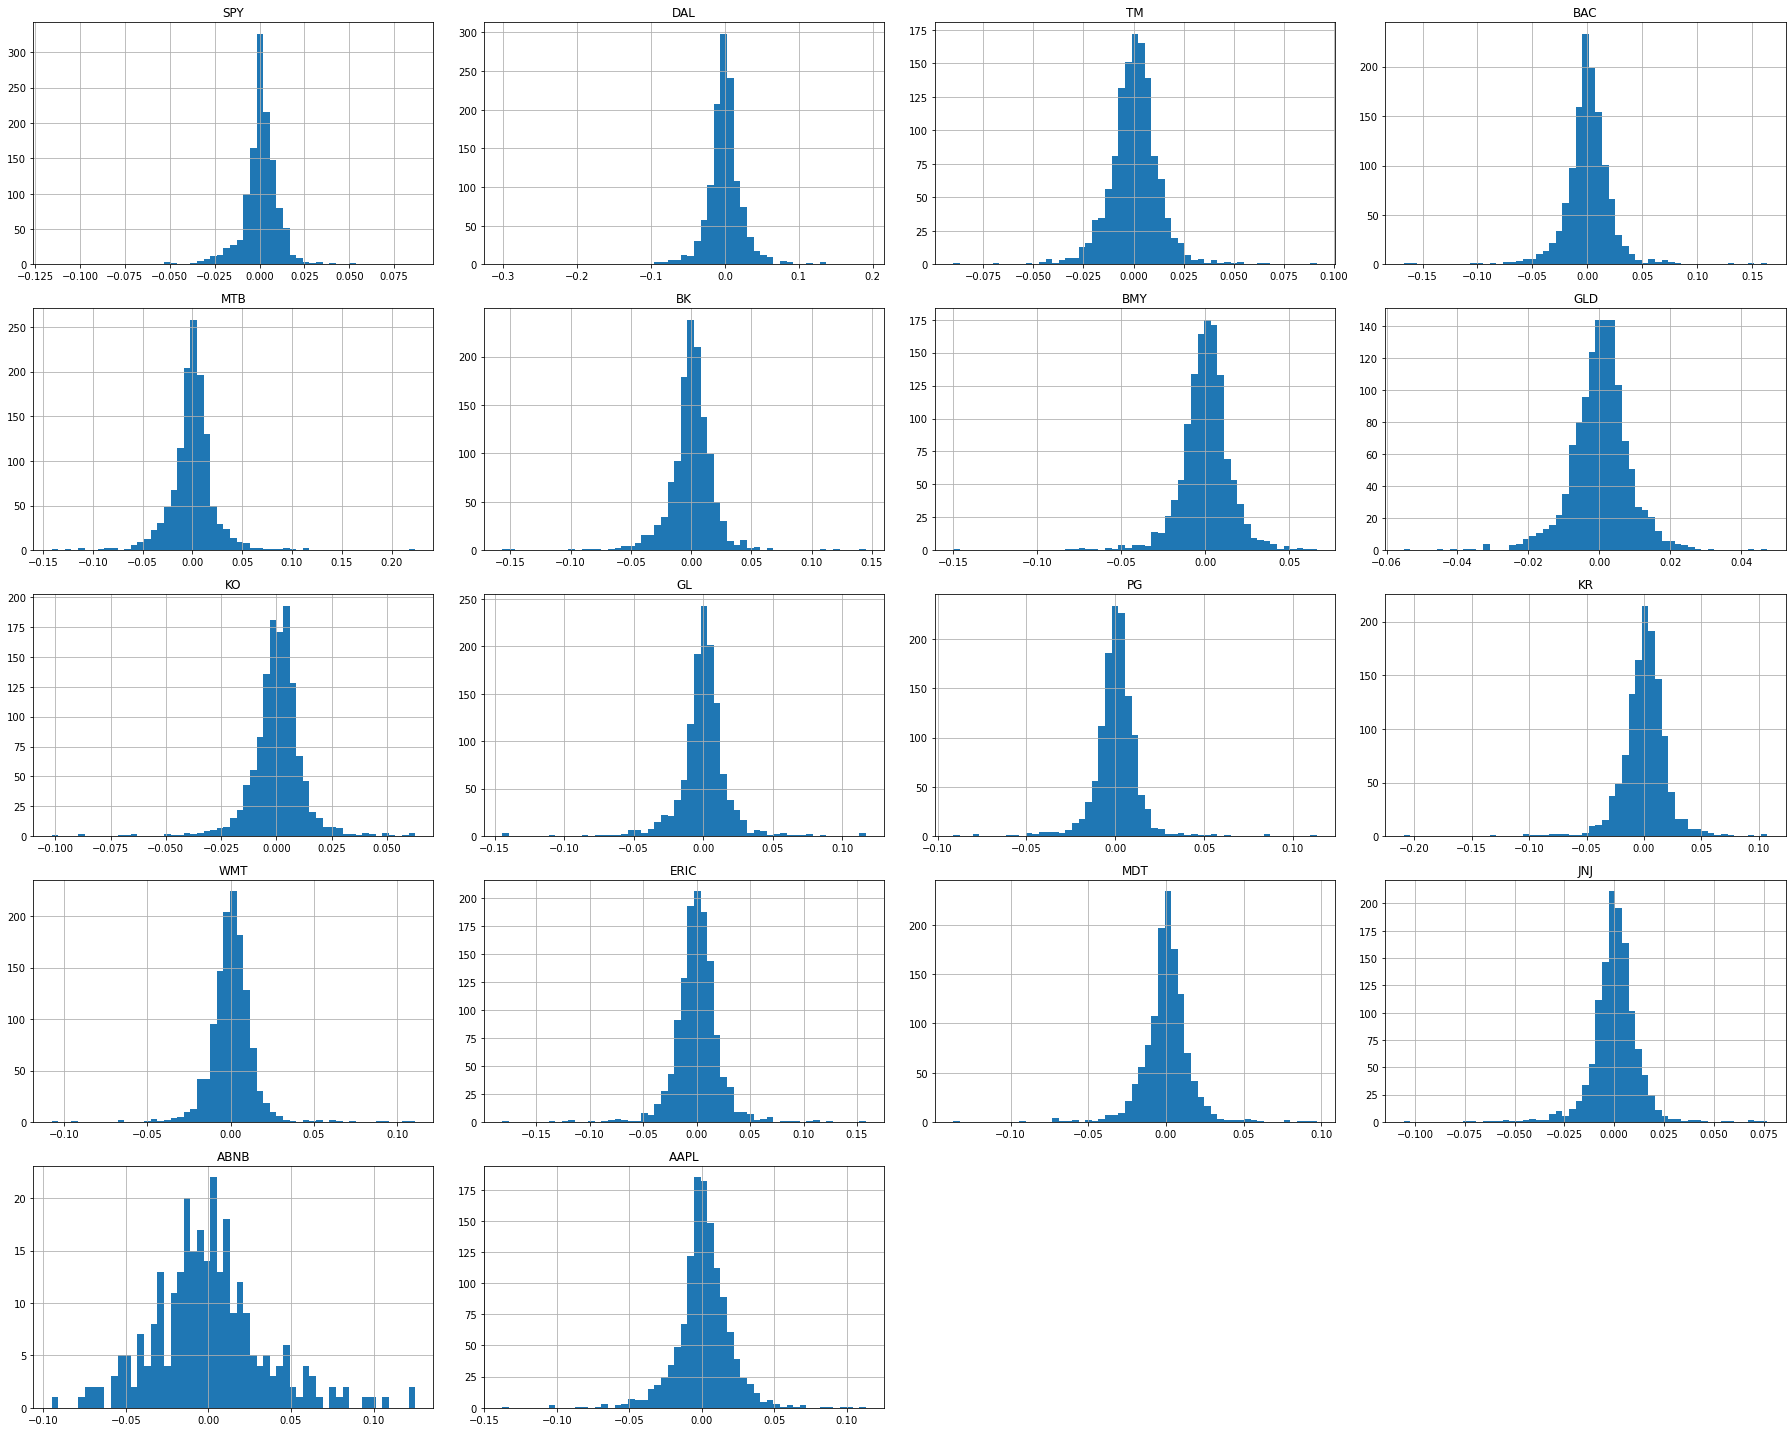

In [30]:
aggregate_stocks_daily_log_ret.hist(bins=55,figsize=(25,20));
plt.tight_layout()

In [31]:
import seaborn as sns

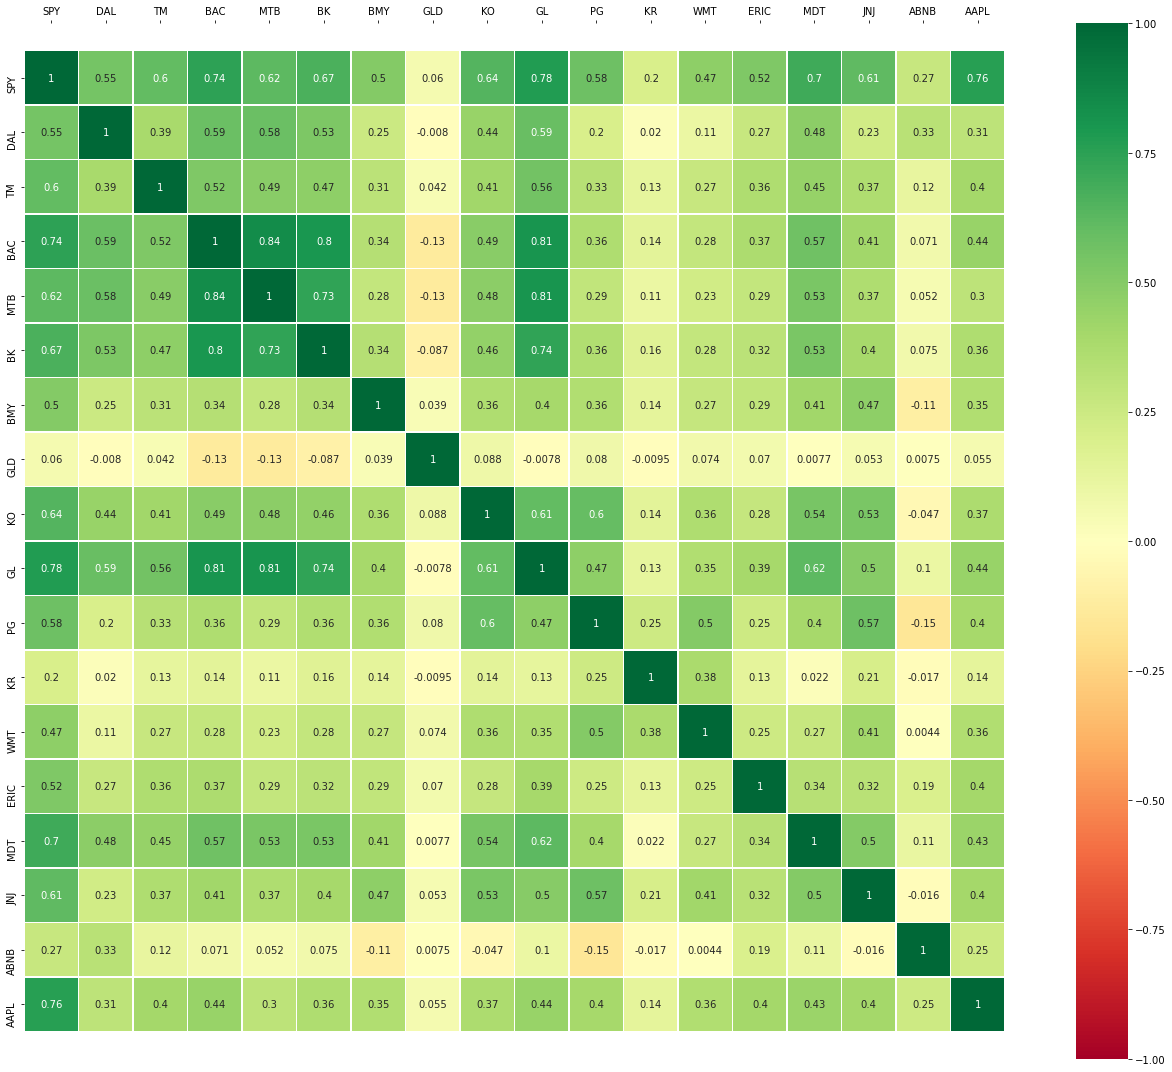

In [32]:
# Correlatio Heatmap
ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_daily_ret, vmin=-1, vmax=1, cmap='RdYlGn', annot = True, linewidths=0.5, square=True)

bottom, top = ax.get_ylim() # To fix the 'matplotlib/seaborn: first and last row cut in half of heatmap plot'#
ax.set_ylim(bottom + 0.5, top - 0.5) # To fix the 'matplotlib/seaborn: first and last row cut in half of heatmap plot'#

ax.xaxis.tick_top()
plt.tight_layout()

In [33]:
## Export Data

join_stock_data.to_excel('Stock_Price_Data.xlsx',sheet_name='Stock_Price_Data')

# Covvariance and Correlation tables 

corr_daily_ret.to_excel('corr_daily_ret.xlsx',sheet_name='corr_daily_ret')
cov_daily_ret.to_excel('cov_daily_ret.xlsx',sheet_name='cov_daily_ret')

corr_daily_log_ret.to_excel('corr_daily_log_ret.xlsx',sheet_name='corr_daily_log_ret')
cov_daily_log_ret.to_excel('cov_daily_log_ret.xlsx',sheet_name='cov_daily_log_ret')

# Daily Returns and Close Price Export
aggregate_stocks_daily_close.to_excel('Stock_Aggregate_Close_Price_Data.xlsx',sheet_name='Close_Price_Data')
aggregate_stocks_daily_ret.to_excel('Stock_Aggregate_Daily_Returns_Data.xlsx',sheet_name='Daily_Returns_Data')
aggregate_stocks_daily_log_ret.to_excel('Stock_Aggregate_Daily_Log_Returns_Data.xlsx',sheet_name='Daily_Log_Returns_Data')

# Descriptive Stats Export 
aggregate_data_stat_daily_ret.to_excel('Descr_Stats_Stock_Aggregate_Daily_Returns_Data.xlsx',sheet_name='Descr_Stats_Daily_Returns')
aggregate_data_stat_daily_ret_log.to_excel('Descr_Stats_Stock_Aggregate_Daily_Log_Returns_Data.xlsx',sheet_name='Descr_Stats_Daily_Log_Returns')